 ## <center> Naive Bayes Classifier </center>

Un clasificador Bayesiano ingenuo (Naive Bayes) es un clasificador probabilístico fundamentado en el teorema de Bayes, y algunas hipótesis simplificadoras adicionales, como lo son el supuesto de independencia entre sus atributos, lo que le da el nombre de *ingenuo*. Formalmente, por el teorema de Bayes, se tiene que:

<h1>$$P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots x_n \mid y)}
                                 {P(x_1, \dots, x_n)}$$</h1>

Usando el supuesto de independencia condicional, se tiene que: 

<h1>$$P(x_i | y, x_1, \dots, x_{i-1}, x_{i+1}, \dots, x_n) = P(x_i | y),$$

$$ P(y \mid x_1, \dots, x_n) = \frac{P(y) \prod_{i=1}^{n} P(x_i \mid y)}
                                 {P(x_1, \dots, x_n)} $$ </h1>

Como $P(x_1, \dots, x_n)$ es constante, el kernel de la distribución posterior queda: 

<h1> $$\begin{align}\begin{aligned}P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)\\\Downarrow\\\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y),\end{aligned}\end{align}$$</h1>

Dependiento del supuesto que se haga, la formulación puede variar.

A pesar de esta simplificación, este método ha funcionado muy bien en diversas situaciones de la vida real.

<h1><center> Un problema de clasificación </h1>

A manera de ejemplo, se utilizará un dataset modificado de la población ǃKung ([ver](https://en.wikipedia.org/wiki/%C7%83Kung_people)) que contiene los siguiente atributos:
    1. Altura
    2. Peso
    3. Edad
 
Y como resultado, se desea saber si es hombre (1) o mujer (0).

In [33]:
%matplotlib inline
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns; sns.set()
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import cross_val_score,KFold,train_test_split

df = pd.read_csv('data.csv',sep=";")

Veamos la distribución de los datos. 

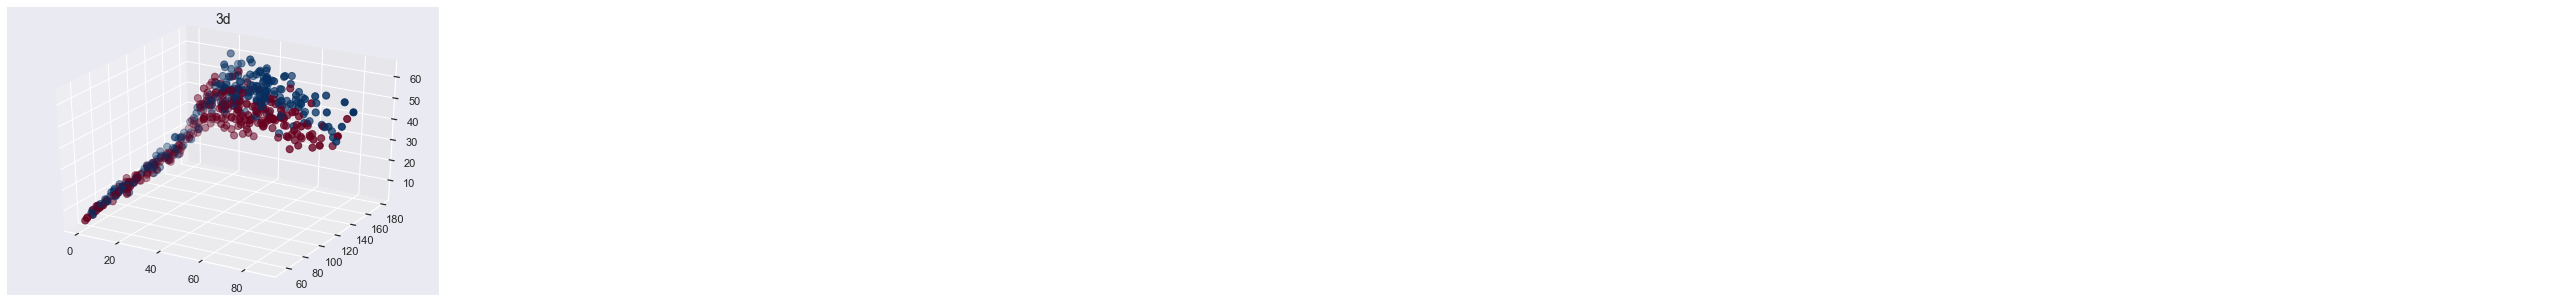

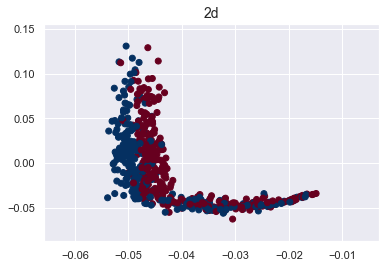

In [34]:
fig = pyplot.figure()
ax = Axes3D(fig)

attributes=list(df)
X=df[attributes[:-1]].values
y=df[attributes[-1]].values

#3d view
ax.set_title('3d', size=14)
ax.scatter(X[:, 0], X[:, 1],X[:, 2], c=y, s=50, cmap='RdBu')
pyplot.show()

#2d projection
fig, ax = plt.subplots()
ax.set_title('2d', size=14)
U,S,V=np.linalg.svd(X)
plt.scatter(U[:, 0], U[:, 1],c=y,cmap='RdBu')
plt.show()

Para entrenar el modelo, haremos uso de la estrategia 70/30 (70% de los datos para entrenamiento y 30% para probar el modelo). 

In [35]:
model = GaussianNB()

(train_inputs, test_inputs, train_classes, test_classes) = train_test_split(X, y, train_size=0.7, random_state=1)

model.fit(train_inputs, train_classes);

print('Hay {} muestras en el conjunto de entrenamiento y {} muestras en el pruebas'.format(train_inputs.shape[0], test_inputs.shape[0]))

Hay 381 muestras en el conjunto de entrenamiento y 164 muestras en el pruebas


Probando el modelo se tiene que:

In [36]:
ynew = model.predict(test_inputs)
print("Number of mislabeled points out of a total {} points : {}, performance {:05.4f}%"
      .format(
          test_inputs.shape[0],
          (test_classes != ynew).sum(),
          100*model.score(test_inputs,test_classes)
))

crossvalidation = KFold(5,shuffle=True, random_state=1)

score = np.mean(cross_val_score(model,X, y,scoring='roc_auc', cv=crossvalidation
                                ,n_jobs=1))
print ('ROC Mean squared error: %.3f' % abs(score))

score = np.mean(cross_val_score(model,X, y,scoring='recall', cv=crossvalidation
                                ,n_jobs=1))
print ('Recall Mean squared error: %.3f' % abs(score))


score = np.mean(cross_val_score(model,X, y,scoring='precision', cv=crossvalidation
                                ,n_jobs=1))
print ('Precision Mean squared error: %.3f' % abs(score))

score = np.mean(cross_val_score(model,X, y,scoring='balanced_accuracy', cv=crossvalidation
                                ,n_jobs=1))
print ('F1 Mean squared error: %.3f' % abs(score))

score = np.mean(cross_val_score(model,X, y,scoring='accuracy', cv=crossvalidation
                                ,n_jobs=1))
print ('Accuracy Mean squared error: %.3f' % abs(score))


Number of mislabeled points out of a total 164 points : 43, performance 73.7805%
ROC Mean squared error: 0.651
Recall Mean squared error: 0.598
Precision Mean squared error: 0.657
F1 Mean squared error: 0.652
Accuracy Mean squared error: 0.655


La matriz de confunsión da:

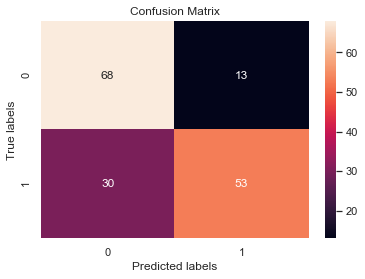

In [38]:
cf=metrics.confusion_matrix(test_classes, ynew)

fig, ax = plt.subplots()
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 